In [80]:
import numpy as np
import tensorflow as tf

# %matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import matplotlib.colors as colors 

import ipysh
import Hunch_utils  as Htls
import Hunch_lsplot as Hplt
import Hunch_tSNEplot as Hsne

# Load the TensorBoard notebook extension
%load_ext tensorboard

%aimport models.AEFIT5
%aimport models.base
%aimport Dataset_QSH
# !pip install livelossplot --user


The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


In [2]:
qsh = Dataset_QSH.Dataset_QSH()
import os
file = ipysh.abs_builddir+'/te_db_r15.npy'
if os.path.isfile(file):
    qsh.load(file)
else:
    qsh.load(ipysh.abs_builddir+'/te_db_1.npy')    
    qsh.rebalance_prel(15)
    qsh.save(ipysh.abs_builddir+'/te_db_r15.npy')
    
qsh.shuffle()
# qsh.filter_number_set(15)
qsh.clean_up_poorcurves(5)
qsh.dim = 15
qsh.set_null(np.nan)
qsh.set_normal_positive()
# qsh.unbias_mean(0.5, 'te')
# qsh.set_normal_positive()

# print("QSH rebalanced 15 points size: ", len(qsh))

# qsh.set_null(np.nan)
# qsh.clip_values(0.1,0.6)
# qsh.set_normal_positive()

## VAE reconstruction - beta KL

This is the Analytical way to compute KL term ... beta is applied to KL

In [ ]:
vae = models.AEFIT.AEFIT(latent_dim=2, feature_dim=30, dprate=0., scale=1, beta=0., geometry=[20,20,10,10])

In [303]:
p = Hplt.LSPlotBokeh()
p.set_model(m)
p.set_data(qsh, counts=3000)
p.plot_notebook(notebook_url='http://172.17.0.2:8888')

/home/andrea/devel/rfx/rfx-hunch/build/conf/python/site-packages/lib/python3.6/site-packages/numpy/core/_methods.py:195: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x, out=x)
/home/andrea/devel/rfx/rfx-hunch/src/Tprofile_read/Hunch_lsplot.py:282: RuntimeWarning: invalid value encountered in true_divide
  return (data - m) / (M-m)


Loading BokehJS ...

In [ ]:
# models.base.train(vae, qsh, batch=200, epoch=1, loss_factor=1e-3)
vae.beta.assign( 1e-6 )
vae.akl = True

h1 = models.base.RecordMetrics()
ds = qsh.ds_array.map(lambda x,y: (x,x))
fit = lambda: vae.fit(ds.skip(5000).batch(100, drop_remainder=True), validation_data=ds.take(5000).batch(100), epochs=15, shuffle=False, callbacks=[h1])
models.base.fn_thread(vae, fit).control_panel()


In [ ]:
fig = plt.figure('kl')
fig.set_dpi(150)

plt.plot(h1.metrics['mkl'][400:1200], label='mkl')
plt.plot(h1.metrics['akl'][400:1200], label='akl')
plt.legend()


# TEST some beta configs

In [ ]:
m = models.AEFIT.AEFIT(latent_dim=2, feature_dim=30, dprate=0., scale=1, beta=0., geometry=[20,20,10,10])
m.beta.assign( 0. )
m.akl = True

h  = models.base.RecordMetrics()
ds = qsh.ds_array.map(lambda x,y: (x,x))
fit = lambda: m.fit(ds.skip(5000).batch(100, drop_remainder=True), validation_data=ds.take(5000).batch(100), epochs=15, shuffle=False, callbacks=[h])
th = models.base.fn_thread(m, fit)
th.control_panel()
th.start()


In [ ]:
fig = plt.figure('kl')
fig.set_dpi(150)

plt.plot(h1.metrics['mkl'], label='mkl')
plt.plot(h1.metrics['akl'], label='akl')
plt.legend()


In [ ]:
m = models.AEFIT.AEFIT(latent_dim=2, feature_dim=30, dprate=0., scale=1, beta=0., geometry=[20,20,10,10])
m.beta.assign( 1e-6 )
m.akl = True

h  = models.base.RecordMetrics()
ds = qsh.ds_array.map(lambda x,y: (x,x))
fit = lambda: m.fit(ds.skip(5000).batch(100, drop_remainder=True), validation_data=ds.take(5000).batch(100), epochs=15, shuffle=False, callbacks=[h])
th = models.base.fn_thread(m, fit)
th.control_panel()


In [ ]:

fig = plt.figure('kl')
fig.set_dpi(150)

plt.plot(h1.metrics['mkl'], label='mkl')
plt.plot(h1.metrics['akl'], label='akl')
plt.legend()

In [255]:
m = models.AEFIT5.AEFIT5(latent_dim=2, feature_dim=30, dprate=0., scale=1, beta=0., geometry=[20,20,10,10])
m.beta.assign( 1e-6 )
m.akl = False

h  = models.base.RecordMetrics()
ds = qsh.ds_array.map(lambda x,y: (x,x))
fit = lambda: m.fit(ds.skip(5000).batch(100, drop_remainder=True), validation_data=ds.take(5000).batch(100), epochs=15, shuffle=False, callbacks=[h])
models.base.fn_thread(m, fit).control_panel()

AEFIT5 ready:


Epoch 1/15


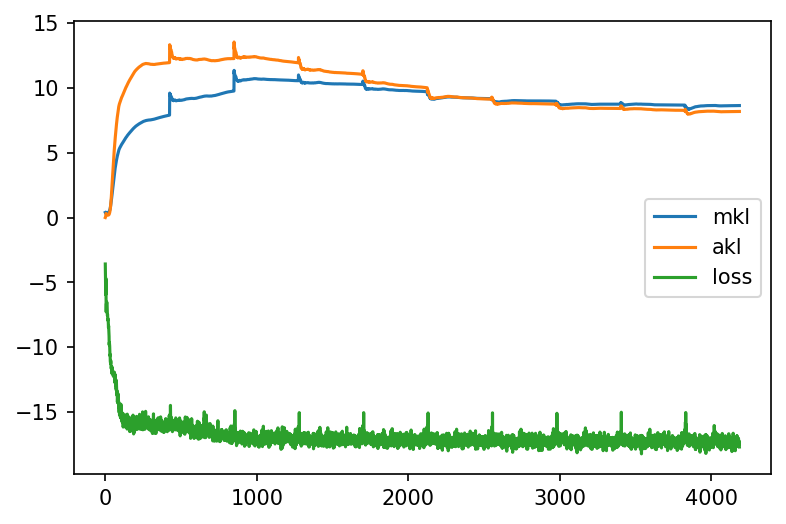

425/425 [==============================] - 14s 32ms/step - loss: 1.8554e-04 - mse: 1.7344e-04 - akl: 8.1914 - mkl: 8.6490 - b: 1.0000e-06 - val_loss: 1.9059e-04 - val_mse: 1.8191e-04 - val_akl: 8.2082 - val_mkl: 8.6783 - val_b: 1.0000e-06
Epoch 11/15
425/425 [==============================] - 12s 27ms/step - loss: 1.8558e-04 - mse: 1.7170e-04 - akl: 8.1065 - mkl: 8.6248 - b: 1.0000e-06 - val_loss: 1.8979e-04 - val_mse: 1.8123e-04 - val_akl: 8.0757 - val_mkl: 8.5570 - val_b: 1.0000e-06
Epoch 12/15
425/425 [==============================] - 11s 27ms/step - loss: 1.8063e-04 - mse: 1.6886e-04 - akl: 8.0622 - mkl: 8.6044 - b: 1.0000e-06 - val_loss: 1.8461e-04 - val_mse: 1.7604e-04 - val_akl: 8.0213 - val_mkl: 8.5722 - val_b: 1.0000e-06
Epoch 13/15
425/425 [==============================] - 11s 27ms/step - loss: 1.7893e-04 - mse: 1.6703e-04 - akl: 8.0104 - mkl: 8.5807 - b: 1.0000e-06 - val_loss: 1.8814e-04 - val_mse: 1.7961e-04 - val_akl: 7.9755 - val_mkl: 8.5299 - val_b: 1.0000e-06
Epoch 14

In [304]:

fig = plt.figure('kl')
fig.set_dpi(150)

plt.plot(h.metrics['mkl'], label='mkl')
plt.plot(h.metrics['akl'], label='akl')
plt.plot(2*np.log(h.metrics['loss']), label='loss')
plt.legend()

In [305]:
m1 = models.AEFIT5.AEFIT5(latent_dim=2, feature_dim=30, dprate=0., scale=1, beta=0., geometry=[20,20,10,10])
m1.beta.assign( 1e-6 )
m1.akl = True

h1  = models.base.RecordMetrics()
ds = qsh.ds_array.map(lambda x,y: (x,x))
fit = lambda: m1.fit(ds.skip(5000).batch(100, drop_remainder=True), validation_data=ds.take(5000).batch(100), epochs=15, shuffle=False, callbacks=[h1])
models.base.fn_thread(m1, fit).control_panel()

AEFIT5 ready:


Epoch 1/15
     56/Unknown - 3s 49ms/step - loss: 0.0203 - mse: 0.0203 - akl: 0.8924 - mkl: 1.2035 - b: 1.0000e-06

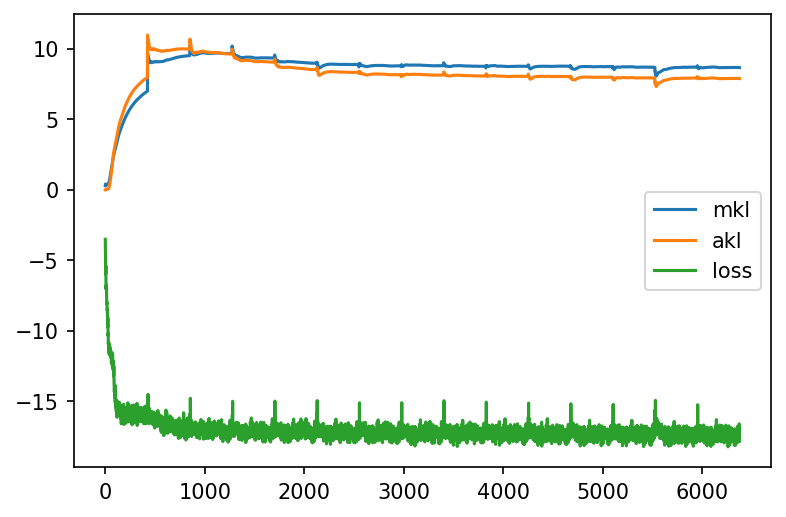

ERROR:tornado.application:Uncaught exception GET /autoload.js?bokeh-autoload-element=2642&bokeh-absolute-url=http://172.17.0.2:44979&resources=none (172.17.0.1)
HTTPServerRequest(protocol='http', host='172.17.0.2:44979', method='GET', uri='/autoload.js?bokeh-autoload-element=2642&bokeh-absolute-url=http://172.17.0.2:44979&resources=none', version='HTTP/1.1', remote_ip='172.17.0.1', headers={'Host': '172.17.0.2:44979', 'Connection': 'keep-alive', 'User-Agent': 'Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/75.0.3770.142 Safari/537.36', 'Accept': '*/*', 'Referer': 'http://172.17.0.2:8888/notebooks/STEP6%20test%20beta%20for%20analytical%20vs%20montecarlo%20KL-Copy1.ipynb', 'Accept-Encoding': 'gzip, deflate', 'Accept-Language': 'en-US,en;q=0.9,it;q=0.8', 'Cookie': '_xsrf=2|7681e25e|5bc584b97bb3adbc813c76ef1ea85067|1569257306; username-172-17-0-2-8888="2|1:0|10:1570701032|24:username-172-17-0-2-8888|44:ZTU3ZjdlZjI1MzcyNDhlNTlmZTllMTM2YzY1MjEyNzI=|53d157e266cf

In [347]:

fig = plt.figure('kl')
fig.set_dpi(150)

plt.plot(h1.metrics['mkl'], label='mkl')
plt.plot(h1.metrics['akl'], label='akl')
plt.plot(2*np.log(h1.metrics['loss']), label='loss')
plt.legend()